# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">یکنواخت سازی هیستوگرام تطبیقی با کنتراست محدود (CLAHE)</div>
# CLAHE (Contrast Limited Adaptive Histogram Equalization) 

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اعمال یکنواخت‌سازی هیستوگرام به صورت سراسری گاهی ایده‌ی خوبی نبوده و خروجی مطلوبی در بر نخواهد داشت. برای مثال تصور زیر را قبل و بعد از یکنواخت‌سازی هیستوگرام ببینید!
</div>    

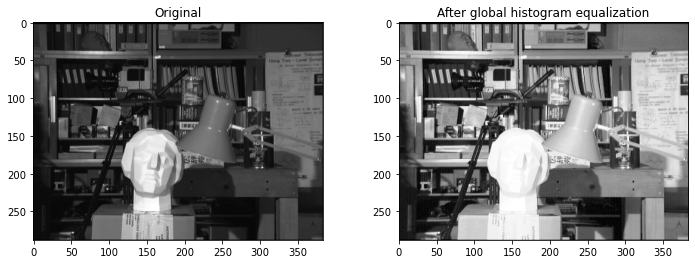

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('images/statue.png', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[12,4])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("After global histogram equalization");

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تصویر پس‌زمینه مطلوب است، اما جزئیات خود مجسمه و نوشته‌ی زیر آن چه طور؟!
<br/>برای حل این مشکل از یکنواخت‌سازی هیستوگرام تطبیقی استفاده می شود.
</div>    

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">استفاده از روش تطبیقی CLAHE</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
در این روش تصویر به بلوک های کوچکی به نام tile به معنی "کاشی" تقسیم می شود
<br />
سایز این بلوک های کوچک را میتوانیم به عنوان پارامتر در هنگام ساخت شی از کلاس  cv2.createCLAHE تعیین کنیم (مقدار پارامتر tileGridSize به طور پیش فرض در OpenCV 8x8 است).
<br/>
سپس روی هر یک از این بلوک های به دست آمده طبق معمول یکنواخت‌سازی هیستوگرام اعمال می‌شوند.
<br/>
اگر در این نواحی کوچک مثلا 8 در 8 نویز وجود داشته باشد با یکنواخت‌سازی هیستوگرام ممکن است نویز ما تقویت شود!  برای جلوگیری از این مشکل، محدودیت کنتراست نیز اعمال می شود. 
اگر هر سطل هیستوگرام بالاتر از حد کنتراست مشخص شده باشد (به طور پیش فرض 40 در OpenCV)، آن پیکسل ها قبل از اعمال یکسان سازی هیستوگرام، بریده می شوند و به طور یکنواخت در سطل های دیگر توزیع می شوند. 
<br/>
در نهایت پس از یکسان سازی، برای چسباندن نواحی یا tile ها و برای حذف مصنوعاتی که در حاشیه این نواحی ایجاد شده، نوعی درون یابی اعمال می شود.
</div>

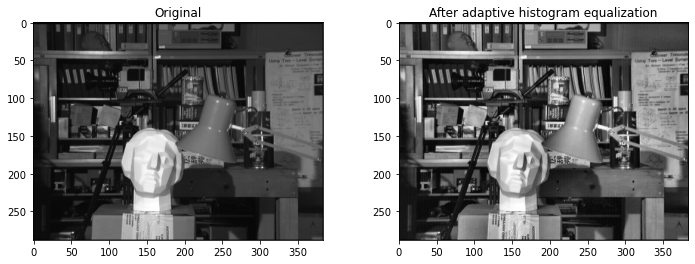

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('images/statue.png', 0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
result = clahe.apply(image)

plt.figure(figsize=[12,4])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("After adaptive histogram equalization");

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">یکنواخت‌سازی هیستوگرام روی تصاویر رنگی</div>

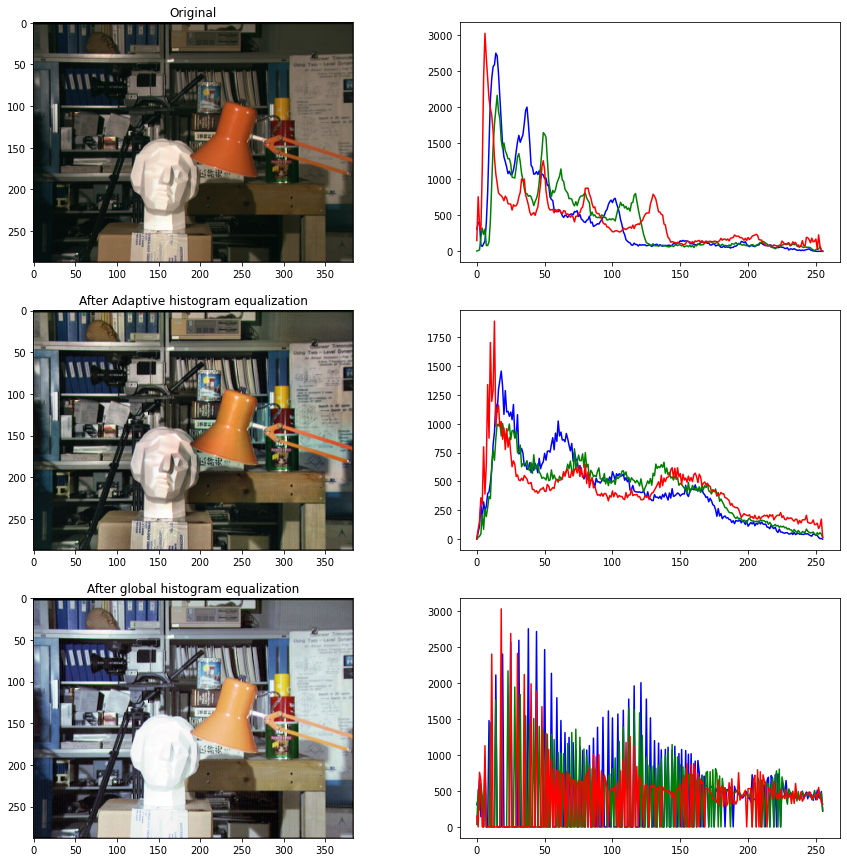

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/statue.png')
###############
# Histogram Equalization
channels = cv2.split(image)

#Adaptive method(CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_channels = []
for ch in channels:
    eq_channels.append(clahe.apply(ch))
eq_clahe_image = cv2.merge(eq_channels)

#Global method
eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)

#plot images
plt.figure(figsize=[15,15])
plt.subplot(321);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(323);plt.imshow(eq_clahe_image[...,::-1]);plt.title("After Adaptive histogram equalization");
plt.subplot(325);plt.imshow(eq_image[...,::-1]);plt.title("After global histogram equalization");


color = ('b', 'g', 'r')
#Original image histogram
plt.subplot(322);
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

#Equualized image histogram with Adaptive method
plt.subplot(324);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#Equualized image histogram with Global method
plt.subplot(326);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html